# Data Visualization and Insight From Pokedex Database
by Mohammad Farhan Fahrezy (13521106)

## Importing Required Library

In [55]:
import numpy as np
import psycopg2
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Total Data
### 1010 Pokemon

# Total Pokemon Type Comparison
From the pie chart obtained (below), it can be seen that out of 1010 Pokémon, the Water type dominates with 154 Pokémon, accounting for 15.2%, making it the most common type. On the other hand, the Ice type is the rarest with only 48 Pokémon, comprising 4.8% of the total. The other types fall within the range between these two extremes.

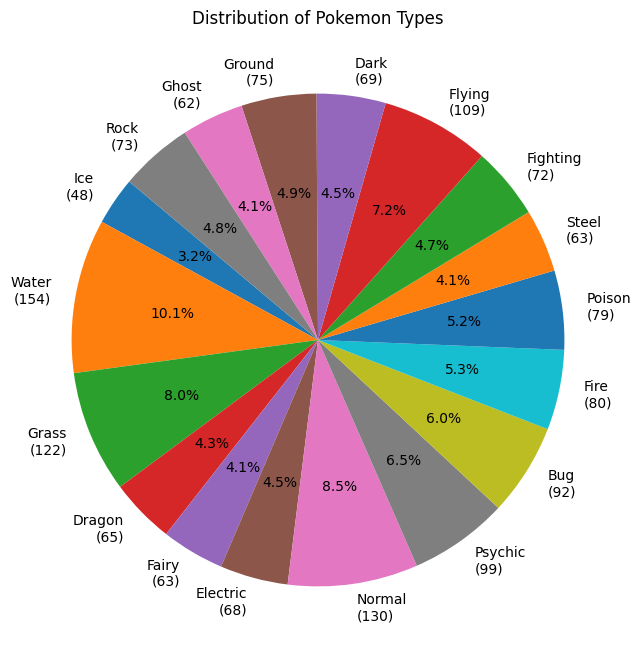

In [47]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("""SELECT type_name, COUNT(*) as type_count
               FROM type
               GROUP BY type_name;""")
pokemon_tuple = cursor.fetchall()

pokemon_type = [str(data[0] + "\n(" + str(data[1]) + ")") for data in pokemon_tuple]
pokemon_type_count = [data[1] for data in pokemon_tuple]

plt.figure(figsize=(8, 8))
plt.pie(pokemon_type_count, labels=pokemon_type, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokemon Types')
plt.show()

conn.commit()

cursor.close()
conn.close()

# Total Pokemon With Evolution and Without Evolution Comparison
From the obtained pie chart (below), it can be found that out of 1010 Pokémon, there are 818 Pokémon (81%) that have evolutions and belong to the evolutionary lines, while the remaining 192 Pokémon (19%) do not have evolutions.

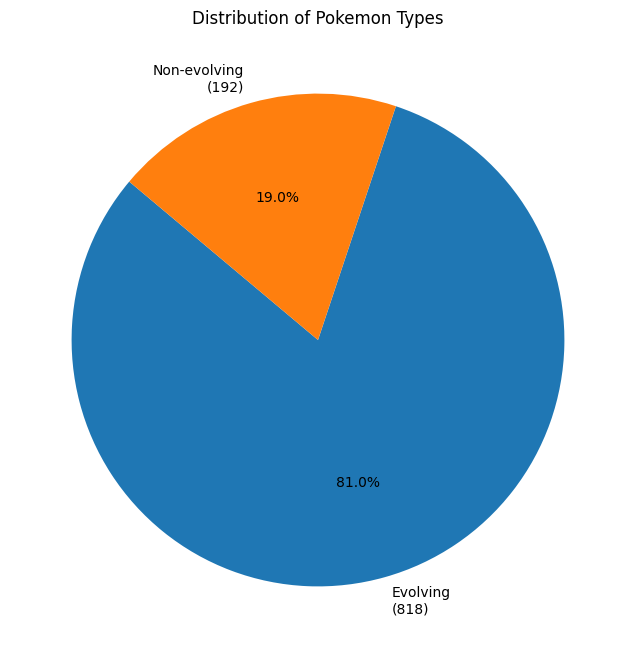

In [48]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("""SELECT DISTINCT pokemon.id FROM pokemon, evolution WHERE pokemon.id = evolution.initial_id or pokemon.id = evolution.evolution_id;""")
evolvingPokemon = len(cursor.fetchall())
cursor.execute("""SELECT DISTINCT id FROM pokemon;""")
nonEvolvingPokemon = len(cursor.fetchall()) - evolvingPokemon

pokemon_evolution_type = [f"Evolving\n({evolvingPokemon})", f"Non-evolving\n({nonEvolvingPokemon})"]
pokemon_evolution_type_count = [evolvingPokemon,nonEvolvingPokemon]

plt.figure(figsize=(8, 8))
plt.pie(pokemon_evolution_type_count, labels=pokemon_evolution_type, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokemon Types')
plt.show()

conn.commit()

cursor.close()
conn.close()

# Top 10 Pokemon With Highest Attack Stats
From the obtained bar chart (below), it can be seen that the top 10 Pokémon with the highest Attack Stat have at least 9 points. The Pokémon with the highest Attack Stat is Kartana with 11 point.

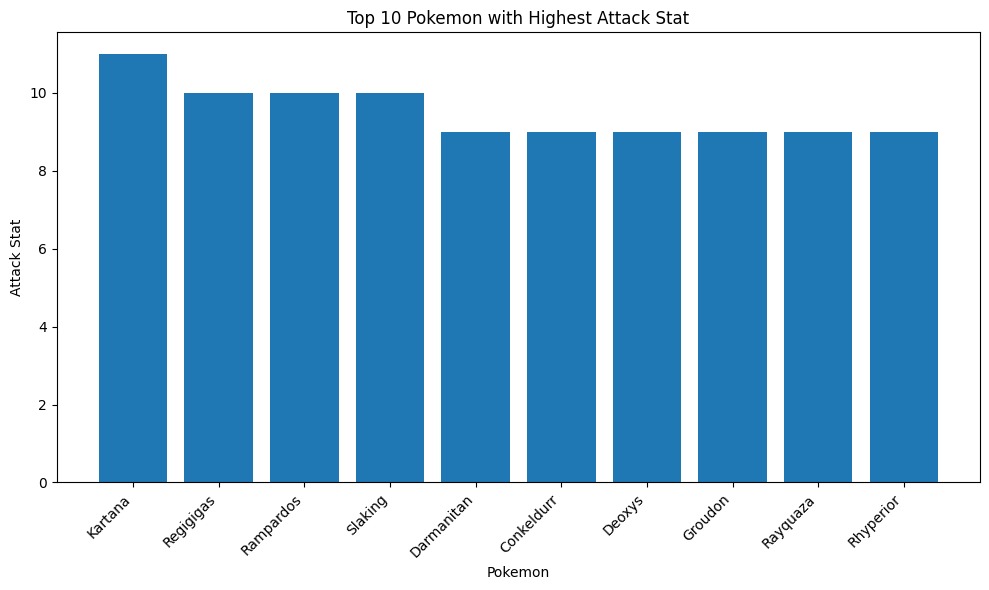

In [49]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("""SELECT pokemon.name, stat.attack FROM pokemon, stat WHERE pokemon.id = stat.pokemon_id ORDER BY stat.attack DESC LIMIT 10;""")
top_10_attack = cursor.fetchall()

labels_top_10_attack = [item[0] for item in top_10_attack]
counts_top_10_attack = [item[1] for item in top_10_attack]

plt.figure(figsize=(10, 6))
plt.bar(labels_top_10_attack, counts_top_10_attack)

plt.xlabel('Pokemon')
plt.ylabel('Attack Stat')
plt.title('Top 10 Pokemon with Highest Attack Stat')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

conn.commit()

cursor.close()
conn.close()

# Top 10 Pokemon With Highest Defense Stats
From the obtained bar chart (below), it can be seen that the top 10 Pokémon with the highest Attack Stat have at least 9 points. The Pokémon with the highest Attack Stat is Shuckle with 14 point.

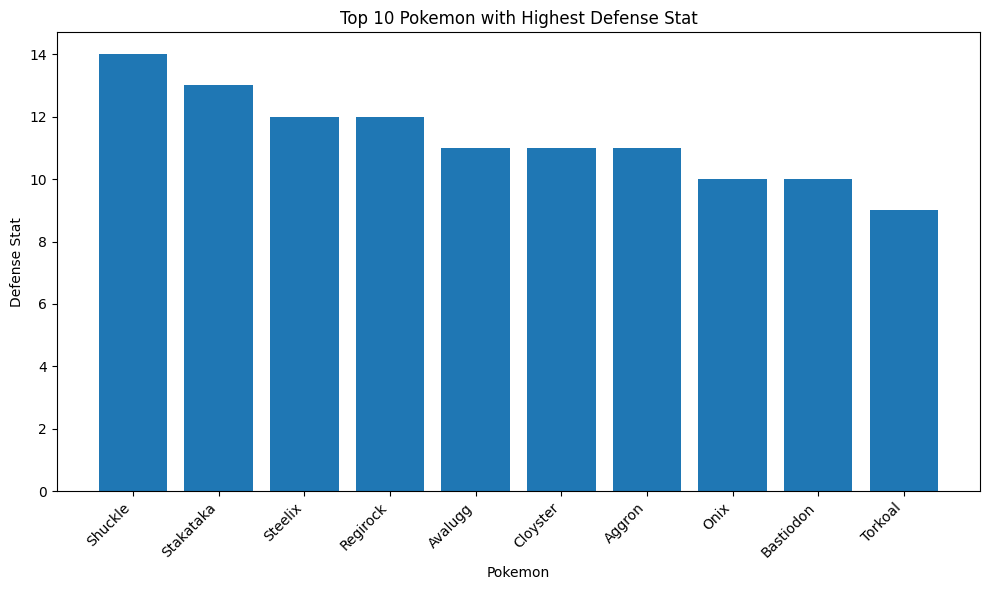

In [50]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("""SELECT pokemon.name, stat.defense FROM pokemon, stat WHERE pokemon.id = stat.pokemon_id ORDER BY stat.defense DESC LIMIT 10;""")
top_10_defense = cursor.fetchall()

labels_top_10_defense = [item[0] for item in top_10_defense]
counts_top_10_defense = [item[1] for item in top_10_defense]

plt.figure(figsize=(10, 6))
plt.bar(labels_top_10_defense, counts_top_10_defense)

plt.xlabel('Pokemon')
plt.ylabel('Defense Stat')
plt.title('Top 10 Pokemon with Highest Defense Stat')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

conn.commit()

cursor.close()
conn.close()

# Comparison of Pokemon Gender for Each Pokemon
From the obtained pie chart, it can be seen that out of 1010 Pokemon, 798 of them (79%) are bi-sexual Pokemon (Male & Female), 30 of them (3%) have only the Male gender, 36 of them (3.6%) have only the Female gender, and the remaining 146 Pokemon (14.5%) have an Unknown Gender.

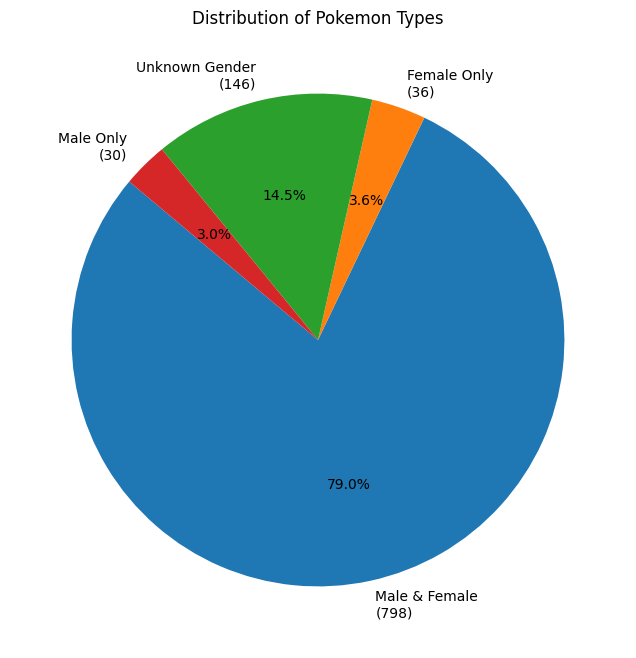

In [51]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("""SELECT
            gender_combination,
            COUNT(*) AS pokemon_count
        FROM
            (SELECT
                CASE
                    WHEN COUNT(DISTINCT gender) = 2 THEN 'Male & Female'
                    WHEN COUNT(DISTINCT gender) = 1 AND MAX(gender) = 'Male' THEN 'Male Only'
                    WHEN COUNT(DISTINCT gender) = 1 AND MAX(gender) = 'Female' THEN 'Female Only'
                    ELSE 'Unknown Gender'
                END AS gender_combination
            FROM
                gender
            GROUP BY
                pokemon_id
            ) AS subquery
        GROUP BY
            gender_combination;""")

pokemon_genders = cursor.fetchall()

pokemon_gender = [str(data[0] + "\n(" + str(data[1]) + ")") for data in pokemon_genders]
pokemon_gender_count = [data[1] for data in pokemon_genders]

plt.figure(figsize=(8, 8))
plt.pie(pokemon_gender_count, labels=pokemon_gender, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokemon Gender')
plt.show()

conn.commit()

cursor.close()
conn.close()



# Comparison of Pokemon Weight with Attack Stat
From the scatterplot and correlation value, it is found that the Weight and Attack stat have a positive correlation with a correlation coefficient of 0.4442451029983751.

Correlation Value: 0.4442451029983751


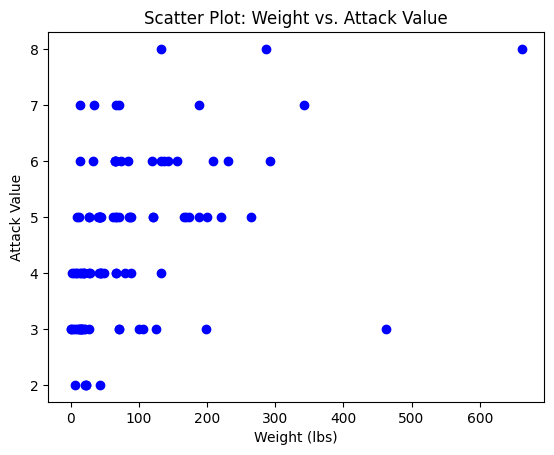

In [58]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("SELECT pokemon.weight, stat.attack FROM pokemon, stat WHERE pokemon.id = stat.pokemon_id LIMIT 100;")
pokemon_weight_attack_tuple = cursor.fetchall()
pokemon_weight_attack = []
for poke in pokemon_weight_attack_tuple:
    pokemon = []
    pokemon_weight = float(poke[0].replace(' lbs',''))
    pokemon.append(pokemon_weight)
    pokemon.append(poke[1])
    pokemon_weight_attack.append(pokemon)

pokemon_weight_scatter = [data[0] for data in pokemon_weight_attack]
pokemon_attack_scatter = [data[1] for data in pokemon_weight_attack]

correlation_coefficient = np.corrcoef(np.array(pokemon_weight_scatter), np.array(pokemon_attack_scatter))[0, 1]
print("Correlation Value:", correlation_coefficient)


plt.scatter(pokemon_weight_scatter, pokemon_attack_scatter, color='blue')

plt.xlabel('Weight (lbs)')
plt.ylabel('Attack Value')
plt.title('Scatter Plot: Weight vs. Attack Value')

plt.show()

conn.commit()

cursor.close()
conn.close()

# Comparison of Pokemon Weight with Defense Stat
From the scatterplot and correlation value, it is found that the Weight and Defense stat have a positive correlation with a correlation coefficient of 0.6552053217187103.

Correlation Value: 0.6552053217187103


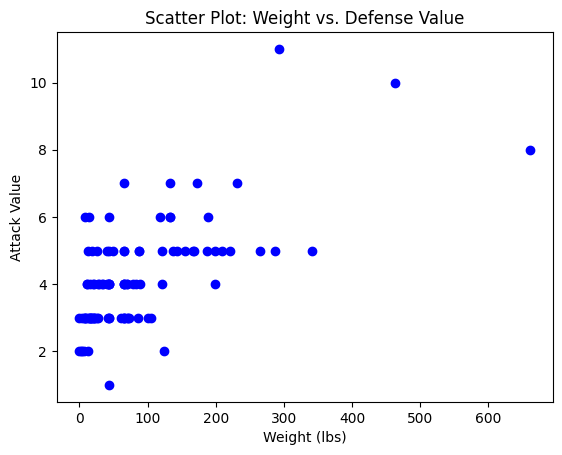

In [60]:
load_dotenv()
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password=os.getenv("PASSWORD"), port=5432)
cursor = conn.cursor()

cursor.execute("SELECT pokemon.weight, stat.defense FROM pokemon, stat WHERE pokemon.id = stat.pokemon_id LIMIT 100;")
pokemon_weight_defense_tuple = cursor.fetchall()
pokemon_weight_defense = []
for poke in pokemon_weight_defense_tuple:
    pokemon = []
    pokemon_weight = float(poke[0].replace(' lbs',''))
    pokemon.append(pokemon_weight)
    pokemon.append(poke[1])
    pokemon_weight_defense.append(pokemon)

pokemon_weight_scatter = [data[0] for data in pokemon_weight_defense]
pokemon_defense_scatter = [data[1] for data in pokemon_weight_defense]

correlation_coefficient = np.corrcoef(np.array(pokemon_weight_scatter), np.array(pokemon_defense_scatter))[0, 1]
print("Correlation Value:", correlation_coefficient)


plt.scatter(pokemon_weight_scatter, pokemon_defense_scatter, color='blue')

plt.xlabel('Weight (lbs)')
plt.ylabel('Attack Value')
plt.title('Scatter Plot: Weight vs. Defense Value')

plt.show()

conn.commit()

cursor.close()
conn.close()